In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle
import glob

In [2]:
# 空の dataframe を作成
df = pd.DataFrame()

# データの読み込み
csv_files = glob.glob("csv/train/*.csv")
for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    data["label"] = csv_file.split("/")[-1].split(".")[0]
    df = pd.concat([df, data])

# 首と胸のy座標の差分を計算
# df["nose_y_diff"] = df["landmark_0_y"].diff().fillna(0)  # 鼻のy座標の差分
# df["left_shoulder_y_diff"] = df["landmark_11_y"].diff().fillna(0)  # 左肩のy座標の差分

# 訓練データとテストデータに分割
X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ランダムフォレストでの学習
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# モデルを.pkl形式のファイルに保存
with open("randomForest.pkl", "wb") as file:
    pickle.dump(clf, file)

# 予測と評価
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

      1-walk       1.00      1.00      1.00        63
  2-quickrun       1.00      1.00      1.00        73
       4-cut       1.00      1.00      1.00        76
       5-mix       1.00      1.00      1.00        69

    accuracy                           1.00       281
   macro avg       1.00      1.00      1.00       281
weighted avg       1.00      1.00      1.00       281



In [3]:
# X_train をファイルに保存
X_train.to_csv("zzz_X_train.csv", index=False)

# y_train をファイルに保存
y_train.to_csv("zzz_y_train.csv", index=False)

# X_test をファイルに保存
X_test.to_csv("zzz_X_test.csv", index=False)

# y_test をファイルに保存
y_test.to_csv("zzz_y_test.csv", index=False)

In [4]:
test = pd.read_csv("csv/test.csv")
pred = clf.predict(test)
pred_df = pd.DataFrame(pred)

pred_df.to_csv("zzz_pred.csv", index=False, header=False)

In [5]:
# 正解ラベル
answer = [
    {
        "label": "other",
        "start": 0,
        "end": 1,
    },
    {
        "label": "1-walk",
        "start": 1,
        "end": 6,
    },
    {
        "label": "other",
        "start": 6,
        "end": 8,
    },
    {
        "label": "1-walk",
        "start": 8,
        "end": 38,
    },
    {
        "label": "other",
        "start": 38,
        "end": 39,
    },
    {
        "label": "2-quickrun",
        "start": 40,
        "end": 55,
    },
    {
        "label": "1-walk",
        "start": 55,
        "end": 75,
    },
    {
        "label": "other",
        "start": 75,
        "end": 81,
    },
    {
        "label": "5-mix",
        "start": 81,
        "end": 89,
    },
    {
        "label": "other",
        "start": 89,
        "end": 94,
    },
    {
        "label": "4-cut",
        "start": 94,
        "end": 110,
    },
    {
        "label": "other",
        "start": 110,
        "end": 114,
    },
    {
        "label": "5-mix",
        "start": 114,
        "end": 125,
    },
    {
        "label": "other",
        "start": 125,
        "end": 129,
    },
    {
        "label": "4-cut",
        "start": 129,
        "end": 140,
    },
    {
        "label": "other",
        "start": 140,
        "end": 143,
    },
    {
        "label": "1-walk",
        "start": 143,
        "end": 160,
    },
    {
        "label": "2-quickrun",
        "start": 160,
        "end": 190,
    },
    {
        "label": "1-walk",
        "start": 190,
        "end": 205,
    },
    {
        "label": "other",
        "start": 205,
        "end": 220,
    },
]

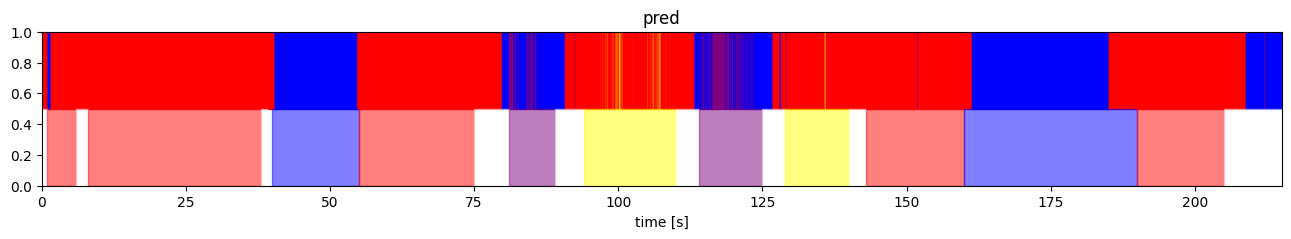

In [6]:
import matplotlib.pyplot as plt


def color_map(label):
    if label == "1-walk":
        return "red"
    elif label == "2-quickrun":
        return "blue"
    # elif label == "3-run":
    #     return "green"
    elif label == "4-cut":
        return "yellow"
    elif label == "5-mix":
        return "purple"
    else:
        return "white"


flame_rate = 60

# pred をグラフに描画
plt.figure(figsize=(16, 2))
plt.title("pred")
plt.xlim(0, len(pred) / flame_rate + 1 / flame_rate)
plt.xlabel("time [s]")

# 背景色を color_map に従って描画
for i, p in enumerate(pred):
    time = i / flame_rate
    plt.axvspan(
        time,
        time + 1 / flame_rate,
        color=color_map(pred[i]),
        alpha=0.5,
        ymin=0.5,
        ymax=1,
    )

# 正解ラベルをグラフに描画
for a in answer:
    plt.axvspan(
        a["start"],
        a["end"],
        color=color_map(a["label"]),
        alpha=0.5,
        ymin=0,
        ymax=0.5,
    )

In [8]:
probs = clf.predict_proba(test)
print(probs)

[[0.65 0.21 0.05 0.09]
 [0.33 0.27 0.16 0.24]
 [0.33 0.27 0.16 0.24]
 ...
 [0.05 0.58 0.04 0.33]
 [0.05 0.58 0.04 0.33]
 [0.05 0.56 0.04 0.35]]


> 1-walk : red\
> 2-quickrun : blue\
> 3-run : green\
> 4-cut : yellow\
> 5-mix : purple
